#  オペレーティングシステム 演習 13
#  mmap

名前と学生証番号を書け. Enter your name and student ID.

 * 名前 Name:
 * 学生証番号 Student ID:

# 1. mmapでファイル読み込み
* mmapでファイルを読み込む単純な例

In [6]:

%%writefile mmap_read.c
#include <assert.h>
#include <err.h>
#include <fcntl.h>
#include <stdio.h>
#include <stdlib.h>
#include <sys/mman.h>
#include <sys/stat.h>
#include <sys/types.h>
#include <unistd.h>

int main(int argc, char ** argv) {
  int i = 1;
  char * filename = (argc > i ? argv[i] : "mmap_1.c"); i++;
  /* ファイルを開く */
  int fd = open(filename, O_RDONLY);
  if (fd == -1) err(1, "open");
  /* ファイルのサイズ */
  struct stat sb[1];
  if (fstat(fd, sb) == -1) err(1, "fstat");
  /* mmap (読み出しのみ) */
  long sz = sb->st_size;
  char * a = mmap(0, sz, PROT_READ, MAP_PRIVATE, fd, 0);
  if (a == MAP_FAILED) err(1, "mmap");
  /* 配列aを表示すると filename の中身を表示することになる*/
  for (long i = 0; i < sz; i++) {
    putchar(a[i]);
  }
  if (munmap(a, sz) == -1) err(1, "mumap");
  if (close(fd) == -1) err(1, "close");
  return 0;
}

Overwriting mmap_read.c


In [7]:
gcc -O3 -Wall mmap_read.c -o mmap_read

In [8]:
# mmap_read.c の中身を表示
./mmap_read mmap_read.c

#include <assert.h>
#include <err.h>
#include <fcntl.h>
#include <stdio.h>
#include <stdlib.h>
#include <sys/mman.h>
#include <sys/stat.h>
#include <sys/types.h>
#include <unistd.h>

int main(int argc, char ** argv) {
  int i = 1;
  char * filename = (argc > i ? argv[i] : "mmap_1.c"); i++;
  /* ファイルを開く */
  int fd = open(filename, O_RDONLY);
  if (fd == -1) err(1, "open");
  /* ファイルのサイズ */
  struct stat sb[1];
  if (fstat(fd, sb) == -1) err(1, "fstat");
  /* mmap (読み出しのみ) */
  long sz = sb->st_size;
  char * a = mmap(0, sz, PROT_READ, MAP_PRIVATE, fd, 0);
  if (a == MAP_FAILED) err(1, "mmap");
  /* 配列aを表示すると filename の中身を表示することになる*/
  for (long i = 0; i < sz; i++) {
    putchar(a[i]);
  }
  if (munmap(a, sz) == -1) err(1, "mumap");
  if (close(fd) == -1) err(1, "close");
  return 0;
}


# 2. mmapでファイル書き込み
* mmapでファイルに書き込む単純な例

In [9]:

%%writefile mmap_write.c
#include <assert.h>
#include <err.h>
#include <fcntl.h>
#include <stdio.h>
#include <stdlib.h>
#include <sys/mman.h>
#include <sys/stat.h>
#include <sys/types.h>
#include <unistd.h>

int main(int argc, char ** argv) {
  int i = 1;
  char * filename = (argc > i ? argv[i] : "hogehoge.txt"); i++;
  long sz         = (argc > i ? atol(argv[i]) : 1000); i++;
  /* ファイルを開く */
  int fd = open(filename, O_RDWR|O_TRUNC|O_CREAT, 0777);
  if (fd == -1) err(1, "open");
  if (posix_fallocate(fd, 0, sz) == -1) err(1, "posix_fallocate");
  /* mmap */
  char * a = mmap(0, sz, PROT_READ|PROT_WRITE, MAP_SHARED, fd, 0);
  if (a == MAP_FAILED) err(1, "mmap");
  /* 配列aに書き込むとfilenameに書き込むことになる */
  for (long i = 0; i < sz; i++) {
    a[i] = i % 128;
  }
  if (munmap(a, sz) == -1) err(1, "mumap");
  if (close(fd) == -1) err(1, "close");
  return 0;
}

Overwriting mmap_write.c


In [10]:
gcc -O3 -Wall mmap_write.c -o mmap_write

In [11]:
./mmap_write hogehoge.txt

In [12]:
cat hogehoge.txt

 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefg


# 3. mmapで(ファイルと無関係な)メモリ割当て
* mmapはファイル読み書きとは無関係に, メモリ割り当て(のみ)のために使えることを示す例

In [13]:

%%writefile mmap_alloc.c
#include <assert.h>
#include <err.h>
#include <fcntl.h>
#include <stdio.h>
#include <stdlib.h>
#include <sys/mman.h>
#include <sys/stat.h>
#include <sys/types.h>
#include <unistd.h>

int main(int argc, char ** argv) {
  int i = 1;
  long sz         = (argc > i ? atol(argv[i]) : 1000); i++;
  /* mmap メモリ割当のみ */
  char * a = mmap(0, sz, PROT_READ|PROT_WRITE, MAP_PRIVATE|MAP_ANONYMOUS, -1, 0);
  if (a == MAP_FAILED) err(1, "mmap");
  /* これは単なるメモリ割り当て */
  for (long i = 0; i < sz; i++) {
    assert(a[i] == 0);
  }
  if (munmap(a, sz) == -1) err(1, "mumap");
  printf("OK\n");
  return 0;
}

Writing mmap_alloc.c


In [14]:
gcc -O3 -Wall mmap_alloc.c -o mmap_alloc

In [15]:
./mmap_alloc

OK


# 4. mmapの性能
## 4-1. mmapでは実際に触った部分だけが読み込まれる
* 以下は大きなファイル全体をmmapして, 返された領域を先頭から終わりまで, 1ページにつき1回(1バイト)触る(読む)プログラム
* 1バイト触るごとに時刻とページフォルト数を計測する
* ポイントは, mmapの呼び出し自身にはほとんど時間がかからないこと
* 返された領域中のあるページを初めて触ったときにページフォルトがおき, OSがそこでページの中身を読み込む
* 従ってmmapを使ってファイルを読むと, 「(mmapした領域の大きさとはほぼ無関係に)実際に触ったページの数に応じた時間しかかからない」という良い特性を持つ

In [20]:

%%writefile read_by_mmap_rec.c
#include <assert.h>
#include <err.h>
#include <stddef.h>
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <sys/mman.h>
#include <sys/time.h>
#include <sys/resource.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>
#include <unistd.h>

/* 1イベントの記録 */
typedef struct {
  struct timeval tv;
  struct rusage ru;
  size_t offset;                /* 読んだ場所 */
} record_t;

/* 全イベントの記録 */
typedef struct {
  long n_records;              /* 配列aのサイズ */
  long i;                       /* 次に書き込むインデクス */
  record_t * a;                 /* recordの配列 */
} records_t;

const long page_sz = 4096;

/* n_records分の記録を保持できるrecords_tを作る */
records_t * mk_records(long n_records) {
  record_t * a = (record_t *)malloc(sizeof(record_t) * n_records);
  memset(a, 1, sizeof(record_t) * n_records);
  /* records_tの割当て */
  records_t * R = (records_t *)malloc(sizeof(records_t));
  R->n_records = n_records;
  R->i = 0;
  R->a = a;
  return R;
}

void destroy_records(records_t * R) {
  free(R);
}

/* 1イベントの記録 */
void record_access(records_t * R) {
  long i = R->i;
  record_t * r = &R->a[i];
  if (gettimeofday(&r->tv, 0) == -1) { err(1, "gettimeofday"); }
  if (getrusage(RUSAGE_SELF, &r->ru) == -1) { err(1, "getrusage"); }
  R->i = i + 1;
}

/* 全イベントの記録を標準出力へ表示 */
void print_records(records_t * R) {
  long m = R->i;
  for (long i = 0; i < m; i++) {
    record_t * r0 = &R->a[0];
    record_t *  r = &R->a[i];
    double t0 = r0->tv.tv_sec + r0->tv.tv_usec * 1.0e-6;
    double t  =  r->tv.tv_sec +  r->tv.tv_usec * 1.0e-6;
    printf("%ld %f %ld %ld %ld %ld\n",
           i,
           t - t0,
           r->ru.ru_minflt,
           r->ru.ru_majflt,
           r->ru.ru_inblock,
           r->ru.ru_oublock);
  }
}

/* szバイトぴったり読む. その前にEOFになったらエラー */
void read_sz(int fd, char * buf, size_t sz) {
  size_t rd = 0;
  while (rd < sz) {
    ssize_t x = read(fd, buf + rd, sz - rd);
    if (x == -1) err(1, "read");
    assert(x > 0);
    rd += x;
  }
  assert(rd == sz);
}

/* 10m, 100k みたいな文字列を読んで数に変換
   e.g., 10k -> 10 * 1024 */
long parse_size(char * s) {
  long n = strlen(s);
  long unit = -1;
  assert(n > 0);
  switch (s[n - 1]) {
  case 'K' :
  case 'k' :
    unit = 1024L;
    break;
  case 'M' :
  case 'm' :
    unit = 1024L * 1024L;
    break;
  case '0' ... '9' :
    unit = 1L;
    break;
  case 'G' :
  case 'g' :
    fprintf(stderr, "do you mean GB? don't be so aggressive\n");
    break;
  case 'T' :
  case 't' :
    fprintf(stderr, "do you mean TB? don't be so aggressive\n");
    break;
  default:
    fprintf(stderr, "invalid unit (%c) specified\n", s[n - 1]);
    break;
  }
  if (unit == -1) return -1;
  long x = atol(s);
  assert(x > 0);
  return x * unit;
}

/* 
 */
int main(int argc, char ** argv) {
  int i = 1;
  char * const filename = (argc > i ? argv[i] : "data.bin"); i++;
  /* 使うデータサイズ (ファイルの先頭から; MB単位) */
  const long data_sz   = (argc > i ? parse_size(argv[i]) : parse_size("64m")); i++;
  /* ファイル全体を読む周回数 */
  const long n_times    = (argc > i ? atol(argv[i]) : 3); i++;
  /* 1周でアクセスする量 */
  const long stride = page_sz;
  const long n_accesses = data_sz / stride;
  const long n_records = n_accesses * n_times + 1;
  records_t * const R = mk_records(n_records);

  fprintf(stderr, "read %ld bytes %ld times\n",
          data_sz, n_times); fflush(stderr);
  for (long i = 0; i < n_times; i++) {
    fprintf(stderr, "%ld th read starts\n", i); fflush(stderr);
    record_access(R);
    const int fd = open(filename, O_RDONLY);
    if (fd == -1) err(1, "open");
    char * const a = mmap(0, data_sz, PROT_READ, MAP_PRIVATE, fd, 0);
    if (a == MAP_FAILED) err(1, "mmap");
    long s = 0;
    for (long j = 0; j < n_accesses; j++) {
      s += a[j * stride];
      record_access(R);
    }
    munmap(a, data_sz);
    if (close(fd) == -1) err(1, "close");
    fprintf(stderr, "sum = %ld\n", s);
  }
  print_records(R);
  destroy_records(R);
  return 0;
}

Overwriting read_by_mmap_rec.c


In [21]:
gcc -O3 -Wall read_by_mmap_rec.c -o read_by_mmap_rec

* 可視化用プログラム

In [22]:
#!/usr/bin/python3
import pdb
import re
import sqlite3
import sys
import matplotlib.pyplot as plt
import numpy as np

def process_line(filename, line, exprs, row_exprs, V, K, R):
    for e in exprs:
        m = e.search(line)
        if m:
            V.update(m.groupdict())
            dK = set(V.keys()).difference(set(K))
            K.extend(list(dK))
    for r in row_exprs:
        if r.search(line):
            R.append(V.copy())
            break

def read_dats(result_dats, exprs, row_exprs):
    K = []
    R = []
    for result_dat in result_dats:
        V = {"file" : result_dat}
        with open(result_dat) as fp:
            for line in fp:
                process_line(result_dat, line, exprs, row_exprs, V, K, R)
    return K, R

def sqlite3_val(x):
    if x is None:
        return None
    try:
        return int(x)
    except ValueError:
        pass
    try:
        return float(x)
    except ValueError:
        pass
    try:
        return float(x)
    except ValueError:
        pass
    return x

def sql_exec(co, cmd, *args):
    #print(cmd)
    return co.execute(cmd, *args)

def dats_to_db(result_dats, exprs, row_exprs):
    K, R = read_dats(result_dats, exprs, row_exprs)
    co = sqlite3.connect(":memory:")
    sql_exec(co, "create table a({cols})".format(cols=",".join(K)))
    insert = ("insert into a({cols}) values({placeholders})"
              .format(cols=",".join(K), placeholders=",".join(["?"] * len(K))))
    for r in R:
        sql_exec(co, insert, tuple([sqlite3_val(r.get(k)) for k in K]))
    co.commit()
    return co

def draw(files, exprs, row_exprs, cmds, start=0, end=-1,
         xlabel=None, ylabel=None, col_is_x=False):
    co = dats_to_db(files, exprs, row_exprs)
    fig, ax = plt.subplots()
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    for cmd,kw in cmds:
        res = list(sql_exec(co, cmd))
        res = res[start:end]
        if len(res) == 0:
            continue
        if len(res[0]) == 1:
            res = list(enumerate(x for x, in res))
            if col_is_x:
                res = [(y,x) for x,y in res]
        x = np.array([x for x,_ in res])
        y = np.array([y for _,y in res])
        plt.plot(x, y, '-o', **kw)
    plt.legend()
    plt.show()
    co.close()

def graph(files, y, start=0, end=-1):
    exprs = [
        re.compile(r"(?P<i>\d+) (?P<t>\d+\.\d+) (?P<minflt>\d+) (?P<majflt>\d+) (?P<inblock>\d+) (?P<oublock>\d+)"),
    ]
    row_exprs = exprs[-1:]
    draw(files, exprs, row_exprs,
         [('select i,%s from a where file="%s"' % (y, filename),
           dict(label="%s" % filename))
          for filename in files], # , "minflt", "majflt"
         xlabel="i", ylabel=y, start=start, end=end)

if sys.argv[0].endswith("read_mmap_vis.py"):
    graph(sys.argv[1:], "t")


* 実行 (ファイルをキャッシュから追い出し, dataの先頭128MBを, {open, mmap, 触る}を3回繰り返す)
* 適宜データの大きさ(128m), 繰り返し数(3)を変えてやってみよ

In [24]:
data=../os11_cache/data.bin
../os11_cache/drop_cache ${data}
./read_by_mmap_rec ${data} 128m 3 > mmap.dat

read 134217728 bytes 3 times
0 th read starts
sum = -10329
1 th read starts
sum = -10329
2 th read starts
sum = -10329


* 可視化 (経過時間)

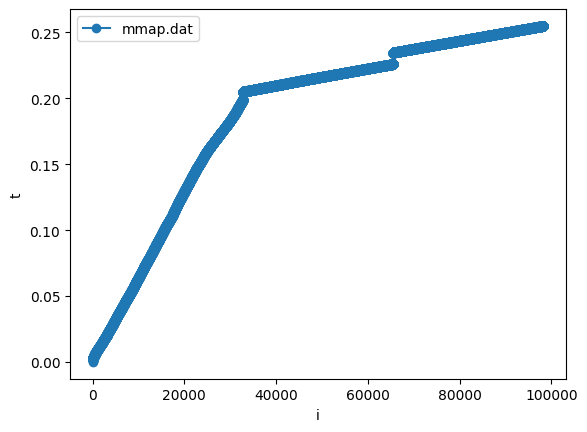

In [25]:
graph(["mmap.dat"], "t",)

  * 時間は, 実際に触ったページ数に比例している
  * すなわちファイルのごく一部しか使わないアプリが全体をmmapしてもほとんどペナルティーはない

* マイナーフォルト (getrusageで取得)

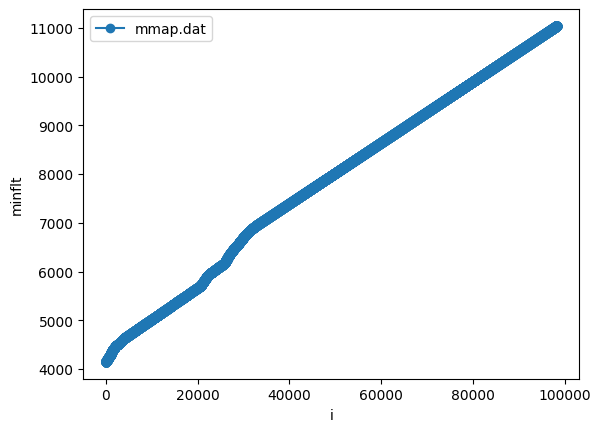

In [26]:
graph(["mmap.dat"], "minflt")

  * 1回読むのにおこるマイナーフォルトの数とページ数を比べてみよ. 何がわかるか? 
  * 拡大表示して, 個々の点が見えるまで拡大してみよ

* メジャーフォルト (getrusageで取得)

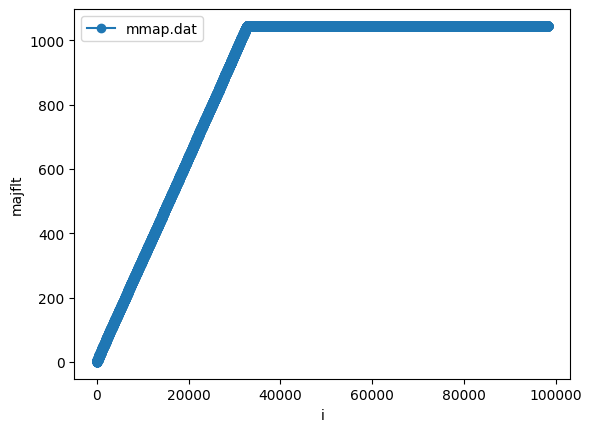

In [27]:
graph(["mmap.dat"], "majflt")

* 読み込みブロック数 (getrusageで取得)

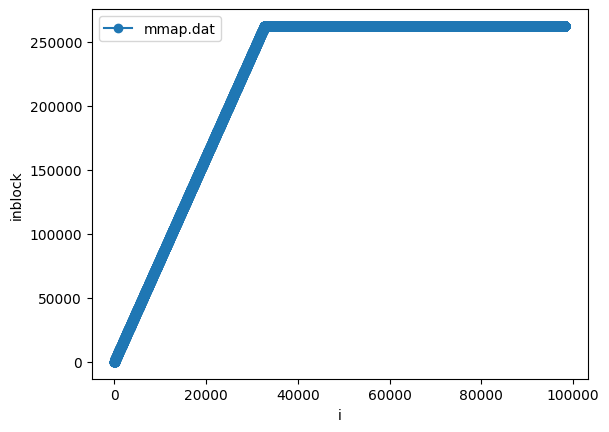

In [28]:
graph(["mmap.dat"], "inblock")

  * getrusageのマニュアルによるとこの数字は "The number of times the filesystem had to perform input" でIOの「回数」だと思えば良いだろう
  * 一回に何バイト位を読み込んでいると思われるか

# 5. mmap vs. read
* 大きなファイル全体をmmapする代わりにファイル全体を実際にreadで読み込む
* その後は同様, 1バイト触るごとに時刻とページフォルト数を計測する

In [29]:

%%writefile read_by_read_rec.c
#include <assert.h>
#include <err.h>
#include <stddef.h>
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <sys/mman.h>
#include <sys/time.h>
#include <sys/resource.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>
#include <unistd.h>

/* 1イベントの記録 */
typedef struct {
  struct timeval tv;
  struct rusage ru;
  size_t offset;                /* 読んだ場所 */
} record_t;

/* 全イベントの記録 */
typedef struct {
  long n_records;              /* 配列aのサイズ */
  long i;                       /* 次に書き込むインデクス */
  record_t * a;                 /* recordの配列 */
} records_t;

const long page_sz = 4096;

/* n_records分の記録を保持できるrecords_tを作る */
records_t * mk_records(long n_records) {
  record_t * a = (record_t *)malloc(sizeof(record_t) * n_records);
  memset(a, 1, sizeof(record_t) * n_records);
  /* records_tの割当て */
  records_t * R = (records_t *)malloc(sizeof(records_t));
  R->n_records = n_records;
  R->i = 0;
  R->a = a;
  return R;
}

void destroy_records(records_t * R) {
  free(R);
}

/* 1イベントの記録 */
void record_access(records_t * R) {
  long i = R->i;
  record_t * r = &R->a[i];
  if (gettimeofday(&r->tv, 0) == -1) { err(1, "gettimeofday"); }
  if (getrusage(RUSAGE_SELF, &r->ru) == -1) { err(1, "getrusage"); }
  R->i = i + 1;
}

/* 全イベントの記録を標準出力へ表示 */
void print_records(records_t * R) {
  long m = R->i;
  for (long i = 0; i < m; i++) {
    record_t * r0 = &R->a[0];
    record_t *  r = &R->a[i];
    double t0 = r0->tv.tv_sec + r0->tv.tv_usec * 1.0e-6;
    double t  =  r->tv.tv_sec +  r->tv.tv_usec * 1.0e-6;
    printf("%ld %f %ld %ld %ld %ld\n",
           i,
           t - t0,
           r->ru.ru_minflt,
           r->ru.ru_majflt,
           r->ru.ru_inblock,
           r->ru.ru_oublock);
  }
}

/* szバイトぴったり読む. その前にEOFになったらエラー */
void read_sz(int fd, char * buf, size_t sz) {
  size_t rd = 0;
  while (rd < sz) {
    ssize_t x = read(fd, buf + rd, sz - rd);
    if (x == -1) err(1, "read");
    assert(x > 0);
    rd += x;
  }
  assert(rd == sz);
}

/* 10m, 100k みたいな文字列を読んで数に変換
   e.g., 10k -> 10 * 1024 */
long parse_size(char * s) {
  long n = strlen(s);
  long unit = -1;
  assert(n > 0);
  switch (s[n - 1]) {
  case 'K' :
  case 'k' :
    unit = 1024L;
    break;
  case 'M' :
  case 'm' :
    unit = 1024L * 1024L;
    break;
  case '0' ... '9' :
    unit = 1L;
    break;
  case 'G' :
  case 'g' :
    fprintf(stderr, "do you mean GB? don't be so aggressive\n");
    break;
  case 'T' :
  case 't' :
    fprintf(stderr, "do you mean TB? don't be so aggressive\n");
    break;
  default:
    fprintf(stderr, "invalid unit (%c) specified\n", s[n - 1]);
    break;
  }
  if (unit == -1) return -1;
  long x = atol(s);
  assert(x > 0);
  return x * unit;
}

/* 
 */
int main(int argc, char ** argv) {
  int i = 1;
  char * const filename = (argc > i ? argv[i] : "data.bin"); i++;
  /* 使うデータサイズ (ファイルの先頭から; MB単位) */
  const long data_sz   = (argc > i ? parse_size(argv[i]) : parse_size("64m")); i++;
  /* ファイル全体を読む周回数 */
  const long n_times    = (argc > i ? atol(argv[i]) : 3); i++;
  /* 1周でアクセスする量 */
  const long stride = page_sz;
  const long n_accesses = data_sz / stride;
  const long n_records = n_accesses * n_times + 1;
  records_t * const R = mk_records(n_records);

  fprintf(stderr, "read %ld bytes %ld times\n",
          data_sz, n_times); fflush(stderr);
  for (long i = 0; i < n_times; i++) {
    fprintf(stderr, "%ld th read starts\n", i); fflush(stderr);
    record_access(R);
    const int fd = open(filename, O_RDONLY);
    if (fd == -1) err(1, "open");
    char * const a = (char *)malloc(data_sz);
    if (!a) err(1, "malloc");
    read_sz(fd, a, data_sz);
    long s = 0;
    for (long j = 0; j < n_accesses; j++) {
      s += a[j * stride];
      record_access(R);
    }
    free(a);
    if (close(fd) == -1) err(1, "close");
    fprintf(stderr, "sum = %ld\n", s);
  }
  print_records(R);
  destroy_records(R);
  return 0;
}

Writing read_by_read_rec.c


In [30]:
gcc -O3 -Wall read_by_read_rec.c -o read_by_read_rec

* 実行 (ファイルをキャッシュから追い出し, {open, read, 触る}を3回繰り返す)

In [31]:
data=../os11_cache/data.bin
../os11_cache/drop_cache ${data}
./read_by_read_rec ${data} 128m 3 > read.dat

read 134217728 bytes 3 times
0 th read starts
sum = -10329
1 th read starts
sum = -10329
2 th read starts
sum = -10329


* 可視化 (経過時間)

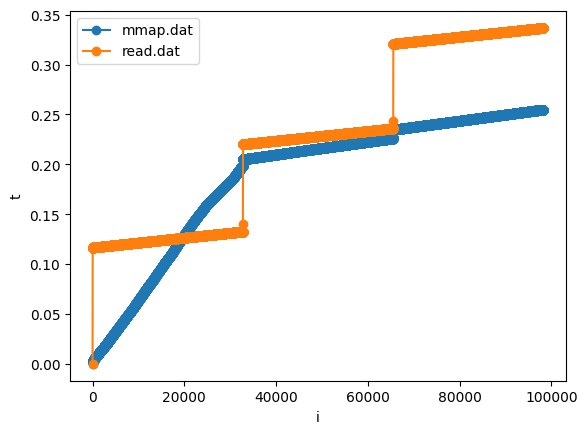

In [32]:
graph(["mmap.dat", "read.dat"], "t")

* マイナーフォルト (getrusageで取得)

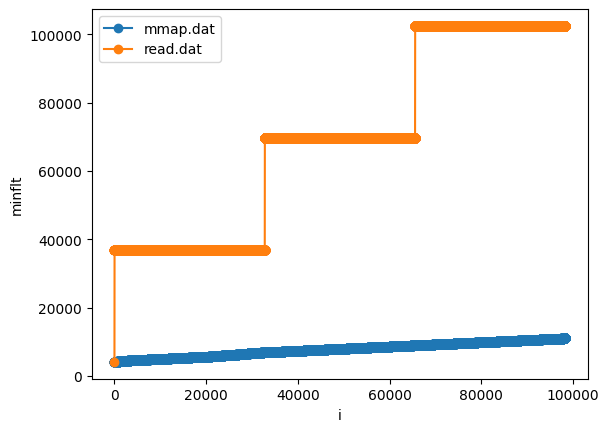

In [33]:
graph(["mmap.dat", "read.dat"], "minflt")

* メジャーフォルト (getrusageで取得)

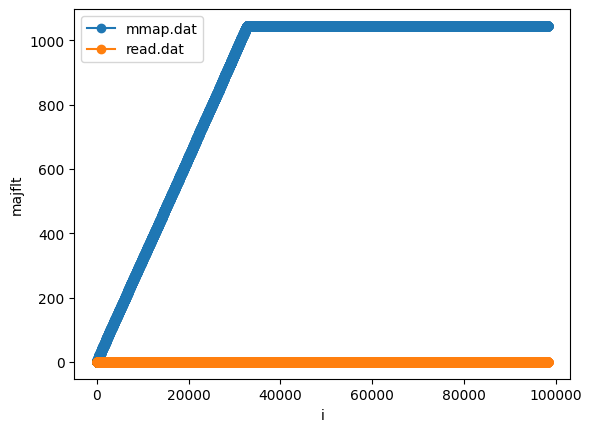

In [34]:
graph(["mmap.dat", "read.dat"], "majflt")

* 読み込みブロック数 (getrusageで取得)

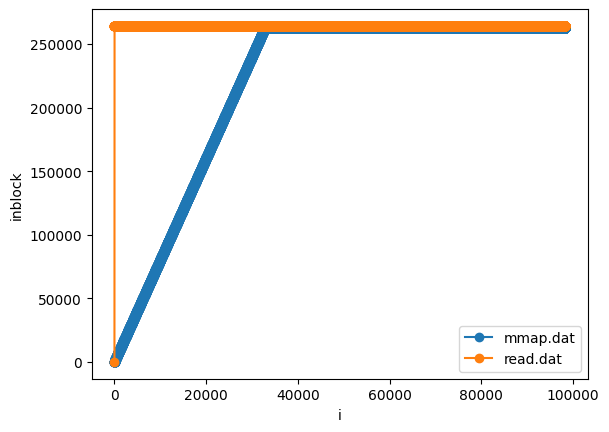

In [35]:
graph(["mmap.dat", "read.dat"], "inblock")

* mmapとreadを比較したグラフから何が読み取れるか?
  * mmap自身にはほとんど時間がかからない
  * ファイル全体を1回読み終わるまでの時間はほとんど同じ
  * 2回目以降も, readはファイル全体を読み込むのに多少時間がかかっている. これはデータをキャッシュからプロセスのメモリへコピーする時間. mmapは大きなデータをキャッシュから読み出す場合にも有効

## 5-1. mmapはメモリ消費量が少ない
* 例えばあるプロセス160MBの領域を全て読み込んだとする
* readだとカーネルがそのファイルをキャッシュに持つために160MB, プロセス自身が160MBのメモリを消費する
* 複数のプロセスが同じことを行えば1プロセスに付き160MB必要になる
* mmapだと, 共有マッピング(MAP_SHARED)であればカーネルがキャッシュに用いている物理メモリを共有できるし, プライベートマッピングであっても書き込みが起きるまでは物理メモリを共有できる
* 複数のプロセスが同じことを行っても同様

* 以下は cg_mem_limit でプロセスが使えるメモリ量を 256MB に制限して, ファイルの先頭160MBを3回読み込む (256 &lt; 160MB x 2 に注意)

In [36]:
data=../os11_cache/data.bin
../os11_cache/drop_cache ${data}
cg_mem_limit ./read_by_mmap_rec ${data} 160m 3 > mmap_mem_limit.dat
../os11_cache/drop_cache ${data}
cg_mem_limit ./read_by_read_rec ${data} 160m 3 > read_mem_limit.dat

read 167772160 bytes 3 times
0 th read starts
sum = -17150
1 th read starts
sum = -17150
2 th read starts
sum = -17150
read 167772160 bytes 3 times
0 th read starts
sum = -17150
1 th read starts
sum = -17150
2 th read starts
sum = -17150


* 可視化

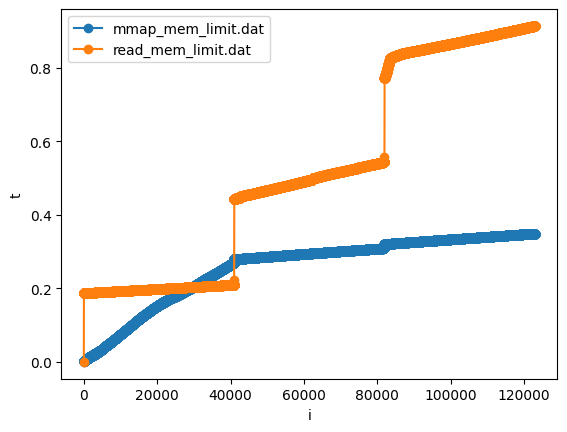

In [37]:
graph(["mmap_mem_limit.dat", "read_mem_limit.dat"], "t")

* mmapの場合は2回目以降, キャッシュが効いている
* readの場合は2回目以降もキャッシュが効いていない状態になっていることがわかるだろう

* 多くのプロセスが同じことをやった場合に差はより顕著になる